In [1]:
data_dir = "/data/projects/dschaub/ANCA-GN_transcriptomics/data/single-cell/exploratory"
working_dir = "/data/projects/dschaub/ANCA-GN_transcriptomics"

In [2]:
%load_ext autoreload
%autoreload 2

import sys
import os
os.chdir(working_dir)

import yaml
import anndata as ad
import matplotlib.pyplot as plt
import mudata as md
import muon as mu
import numpy as np
import scanpy as sc
import scanpy.external as sce
from scipy import sparse
from matplotlib.colors import LinearSegmentedColormap
import matplotlib as mpl

from utils.utils import *
from utils.plotting import *

sc.settings.verbosity = 0
sc.set_figure_params(dpi=80)
sns.set(style="white")

Global seed set to 0
/opt/conda/envs/scvi-env/lib/python3.9/site-packages/flax/struct.py:136: FutureWarning: jax.tree_util.register_keypaths is deprecated, and will be removed in a future release. Please use `register_pytree_with_keys()` instead.
  jax.tree_util.register_keypaths(data_clz, keypaths)
/opt/conda/envs/scvi-env/lib/python3.9/site-packages/flax/struct.py:136: FutureWarning: jax.tree_util.register_keypaths is deprecated, and will be removed in a future release. Please use `register_pytree_with_keys()` instead.
  jax.tree_util.register_keypaths(data_clz, keypaths)


## Load data

In [3]:
path = os.path.join(
    data_dir, "ANCA_exploratory_27PK27PB_CD4Teff_TotalVI.h5mu"
)
mudata = md.read_h5mu(path)
mod_rna = mudata.mod["rna"]
mod_cite = mudata.mod["cite"]
mudata

MuData object with n_obs × n_vars = 8823 × 15716
  2 modalities
    rna:	8823 x 15510
      obs:	'patient', 'sample', 'tissue', 'cell_type_yu', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'leiden_0.3', 'leiden_0.4', 'leiden_0.5', 'leiden_0.6', 'leiden_0.7', 'leiden_0.8', 'leiden_0.9', 'leiden_1.0', 'leiden_1.1', 'leiden_1.2', 'leiden_1.3', 'leiden_1.4', 'leiden_1.5', 'leiden_1.6', 'leiden_1.7', 'leiden_1.8', 'leiden_1.9', 'cell_type', 'leiden_0.1', 'leiden_0.2', 'leiden_2.0'
      var:	'n_cells', 'mt', 'ribo', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
      uns:	'cell_type_yu_colors', 'dea_leiden_0.8', 'leiden', 'leiden_0.1_colors', 'leiden_0.2_colors', 'leiden_0.3_colors', 'leiden_0.4_colors', 'leiden_0.5_colors', 'leiden_0.6_colors', 'leiden_0.7_colors', 'leiden_0.8_colors', 'leiden_0.9_colors', 'leiden_1.0_colors', 'leiden_1.1_colors', 'leiden_1.2_colors', 'leiden_1.3_colors', 'leiden_1.4_colors', 'leiden_1.5_colors', 'leiden_1.6_colors', 'leiden_1.7_colors', 'leiden_1.8_colors', 'leiden_1.9_colors', 'leiden_2.0_colors', 'log1p', 'neighbors', 'patient_colors', 'sample_colors', 'tissue_colors', 'umap'
      obsm:	'X_harmony', 'X_totalvi', 'X_umap'
      layers:	'counts', 'log1p'
      obsp:	'connectivities', 'distances'
    cite:	8823 x 206
      obs:	'patient', 'sample', 'tissue', 'cell_type_yu', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts'
      var:	'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells'
      layers:	'clr', 'counts'

In [4]:
cluster_key = "leiden_0.8"
get_cluster_names(mod_rna, cluster_key)

"0": "",
"1": "",
"2": "",
"3": "",
"4": "",
"5": "",
"6": "",
"7": "",
"8": "",
"9": "",
"10": "",
"11": "",


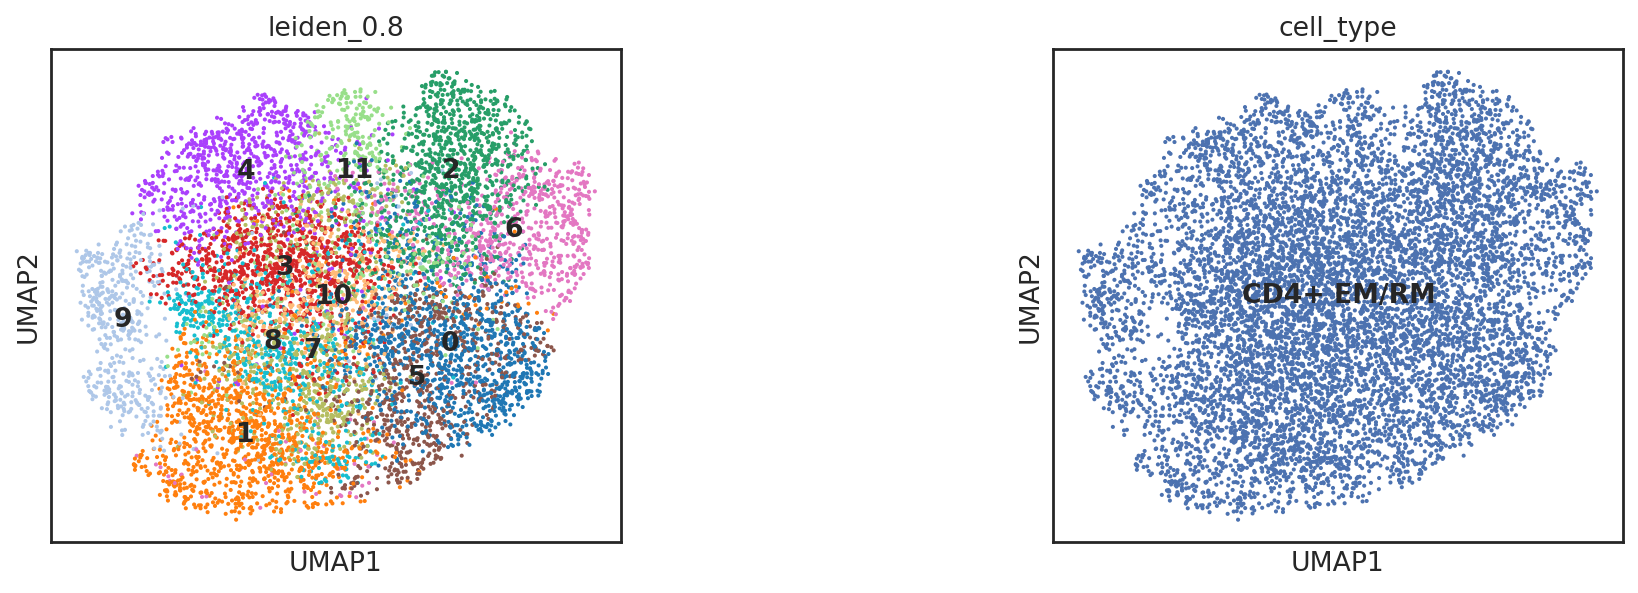

In [5]:
sc.pl.umap(mod_rna, color=[cluster_key, "cell_type"], legend_loc="on data", wspace=0.6)

Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings 

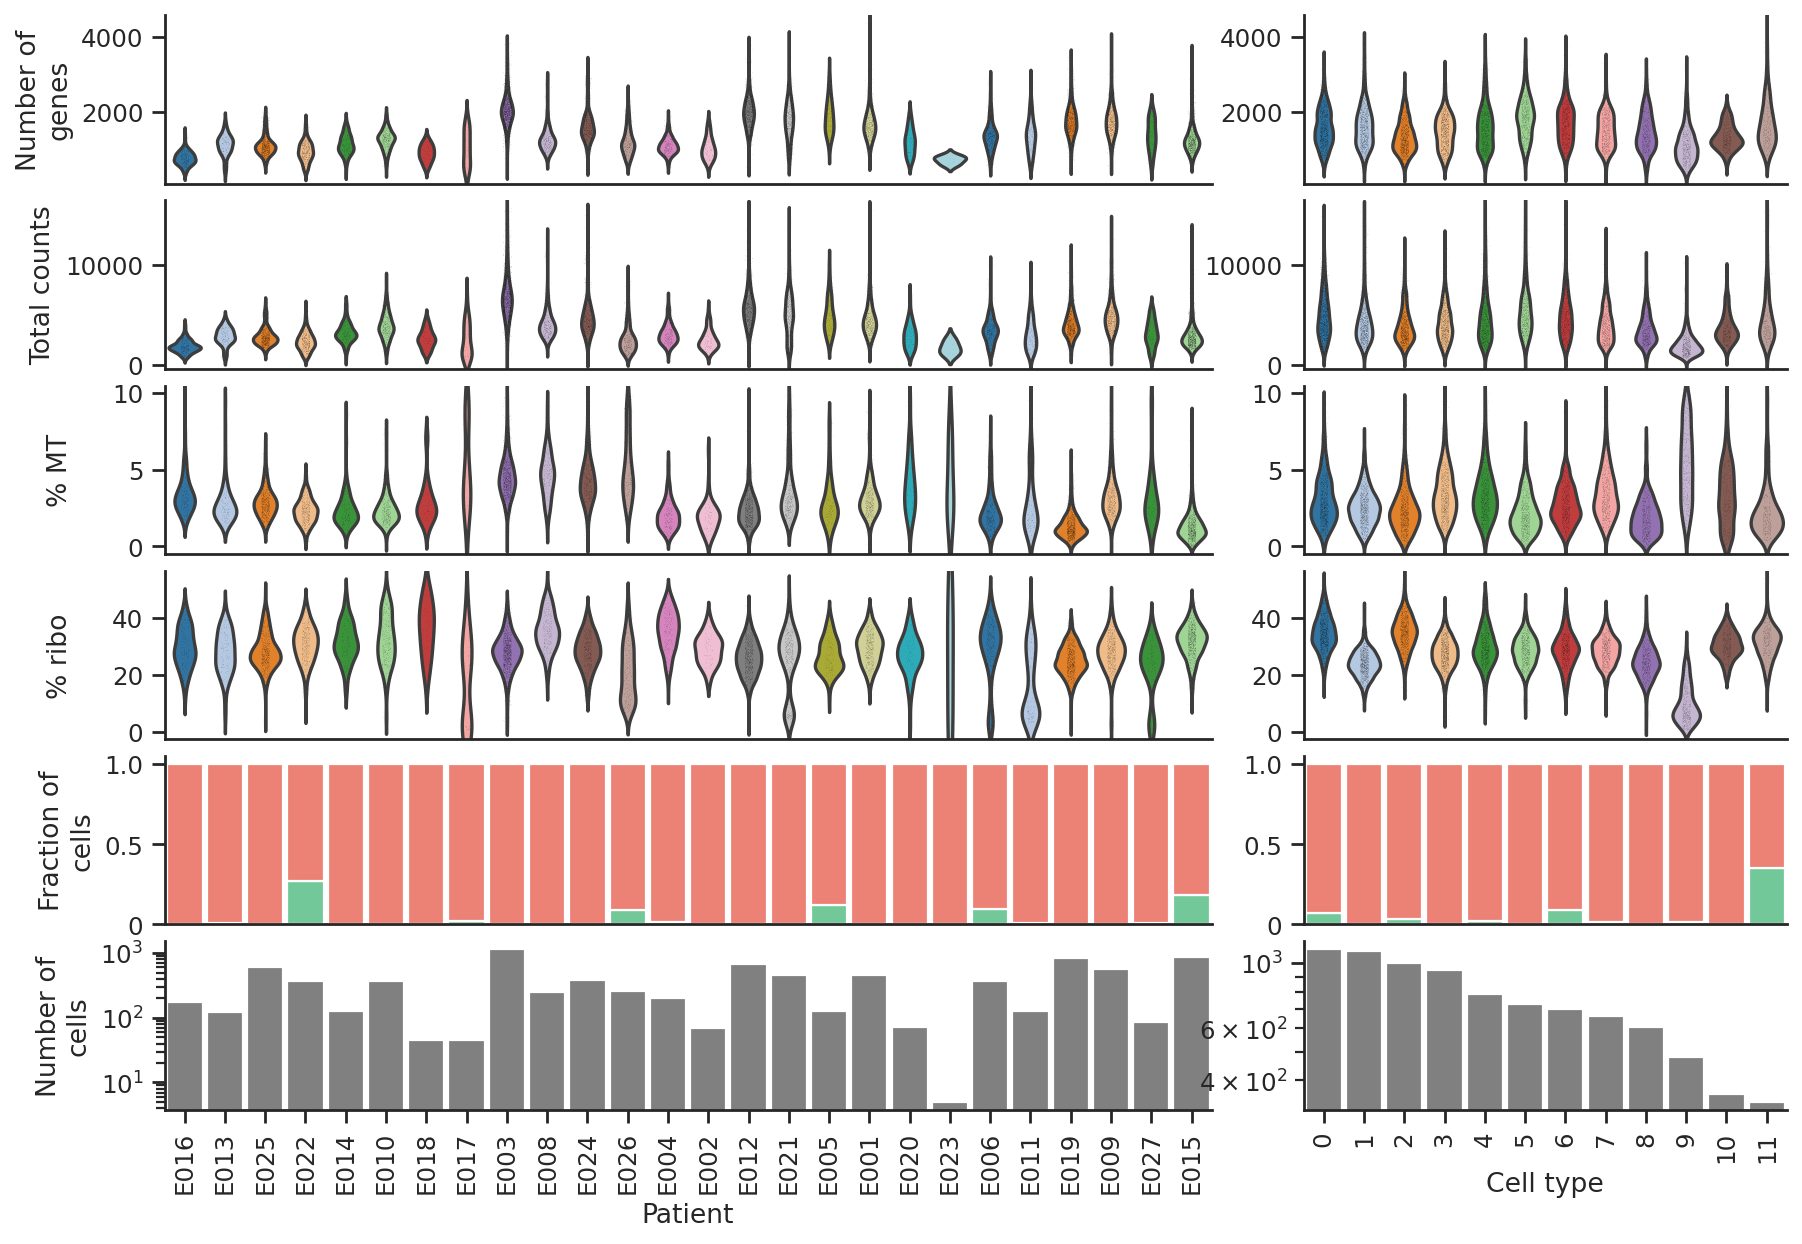

In [6]:
plot_qc(mod_rna, "leiden_0.8")

In [7]:
annotations = {
    "0": "Th17",
    "1": "Th1",
    "2": "Tfh",
    "3": "Th1-like",
    "4": "Tc1-like",
    "5": "Th17",
    "6": "Tfh",
    "7": "Th1-like",
    "8": "Th1",
    "9": "Th1",
    "10": "Th1-like",
    "11": "Th1-like",
}

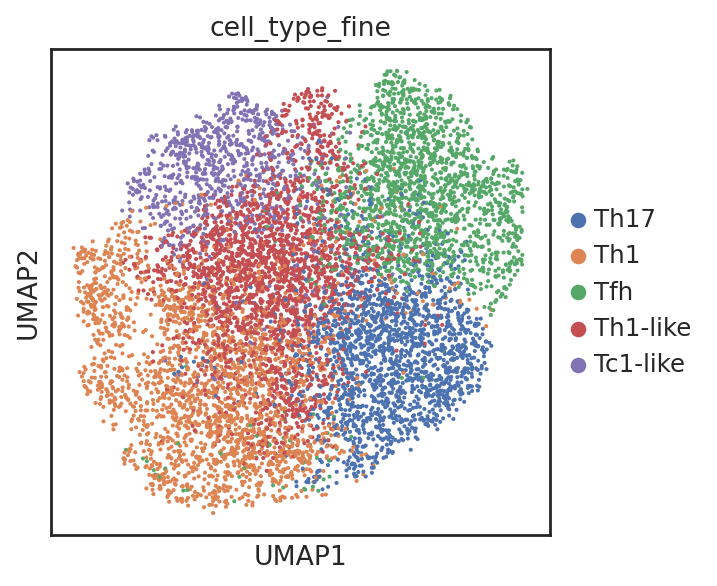

In [8]:
mod_rna.obs["cell_type_fine"] = mod_rna.obs[cluster_key].replace(annotations)
sc.pl.umap(mod_rna, color="cell_type_fine")

## Save data

In [9]:
save_path = os.path.join(
    data_dir, "ANCA_exploratory_27PK27PB_CD4Teff_annotated.h5mu"
)
mudata = md.MuData(
    {
        "rna": mod_rna.copy(),
        "cite": mod_cite.copy(),
    }
)
mudata.write_h5mu(save_path)

## Double check markers

In [ ]:
cmap_cd4 = {
    "Th17": "#7B1717",
    "Th1": "#A91F1F",
    "Tfh": "#E0B093",
    "Th1-like": "#D62728",
    "Tc1-like": "#D2D2D2",
}

labels_cd4 = [
    "Th17",
    "Th1",
    "Th1-like",
    "Tfh",
    "Tc1-like",
]
plot_single_stacked_bar(
    mod_rna,
    labels=labels_cd4,
    color_map=cmap_cd4,
    celltype_col="cell_type_fine",
    save_path=None,
    ylabel="CD4+ Teff subset proportions",
)

In [ ]:
all_marker_results, filtered_marker_results, best_markers = run_de_pipeline(
    mod_rna,
    "cell_type_fine",
    mod="rna",
    top_n=5,
    min_expression=0.05,
)

## Protein markers

In [ ]:
mod_cite.obs["cell_type_fine"] = mod_rna.obs["cell_type_fine"]
mod_cite.obsm["X_umap"] = mod_rna.obsm["X_umap"]
protein_clr(mod_cite)

In [ ]:
all_marker_results, filtered_marker_results, best_markers = run_de_pipeline(
    mod_cite,
    "cell_type_fine",
    mod="protein",
    top_n=5,
    min_expression=0.1,
)